In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump
import time

In [ ]:
df = pd.read_csv("drive/MyDrive/archive/Phishing_Legitimate_full.csv")

In [ ]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [ ]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(10000, 50)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [ ]:
class_counts = df['CLASS_LABEL'].value_counts()
print(class_counts)

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


Text(0, 0.5, 'Count')

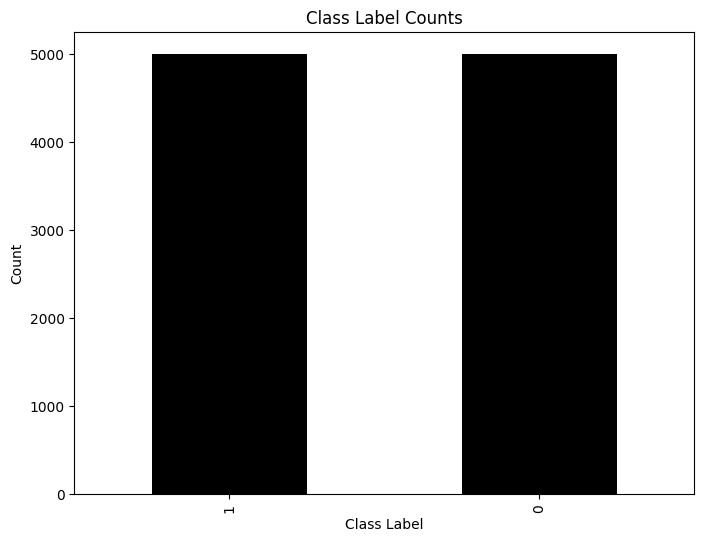

In [ ]:
plt.figure(figsize=(8, 6)) #Tạo một hình vẽ mới với kích thước 8x6 inches
class_counts.plot(kind='bar', color='black') #Vẽ biểu đồ cột của số lượng mẫu trong mỗi nhóm (giá trị) của cột "CLASS_LABEL"
plt.title('Class Label Counts') #đặt tên cho biểu đồ
plt.xlabel('Class Label') #đặt nhãn cho trục x
plt.ylabel('Count') #đặt nhãn cho trục y

In [ ]:
#Tạo một DataFrame mới là X để loại bỏ các cột không cần thiết
X = df.drop(columns=['CLASS_LABEL', 'id', 'HttpsInHostname','PathLength','SubdomainLevelRT',
                     'RightClickDisabled','UrlLength','PopUpWindow','PctExtResourceUrlsRT',
                     'NumHash','DoubleSlashInPath','AtSymbol','FakeLinkInStatusBar',
                     'UrlLengthRT','HostnameLength','EmbeddedBrandName','IpAddress',
                     'DomainInSubdomains','TildeSymbol','RandomString'])
#Tạo một y chứa cột 'CLASS_LABEL', là biến mục tiêu cần dự đoán.
y = df['CLASS_LABEL']
#Tạo một đối tượng StandardScaler để chuẩn hóa dữ liệu.
scaler = StandardScaler()
#Chuẩn hóa dữ liệu đầu vào X (đảm bảo rằng các đặc trưng sẽ có giá trị trung bình gần bằng 0 và độ lệch chuẩn gần bằng 1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #Tách dữ liệu thành tập huấn luyện và tập kiểm tra

Lớp RandomForestClassifier từ thư viện scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Huấn luyện mô hình
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Training time: {:.2f} seconds" .format(training_time))
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Training time: 1.27 seconds
Accuracy: 98.25%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



<Axes: >

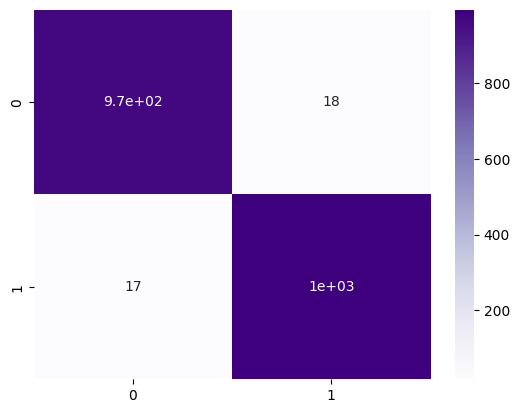

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Purples')

lớp DecisionTreeClassifier từ thư viện scikit-learn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth=3)
start_time = time.time()
treemodel.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

[Text(0.5, 0.875, 'x[29] <= -0.907\ngini = 0.5\nsamples = 8000\nvalue = [4012, 3988]'),
 Text(0.25, 0.625, 'x[3] <= 1.185\ngini = 0.082\nsamples = 2368\nvalue = [101, 2267]'),
 Text(0.125, 0.375, 'x[23] <= 1.108\ngini = 0.066\nsamples = 2342\nvalue = [80, 2262]'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 2289\nvalue = [58, 2231]'),
 Text(0.1875, 0.125, 'gini = 0.486\nsamples = 53\nvalue = [22, 31]'),
 Text(0.375, 0.375, 'x[13] <= 1.06\ngini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(0.3125, 0.125, 'gini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.75, 0.625, 'x[14] <= -0.703\ngini = 0.424\nsamples = 5632\nvalue = [3911, 1721]'),
 Text(0.625, 0.375, 'x[17] <= -0.948\ngini = 0.302\nsamples = 1862\nvalue = [345, 1517]'),
 Text(0.5625, 0.125, 'gini = 0.456\nsamples = 259\nvalue = [168, 91]'),
 Text(0.6875, 0.125, 'gini = 0.196\nsamples = 1603\nvalue = [177, 1426]'),
 Text(0.875, 0.375, 'x[22] <= 0.693\ngini = 0

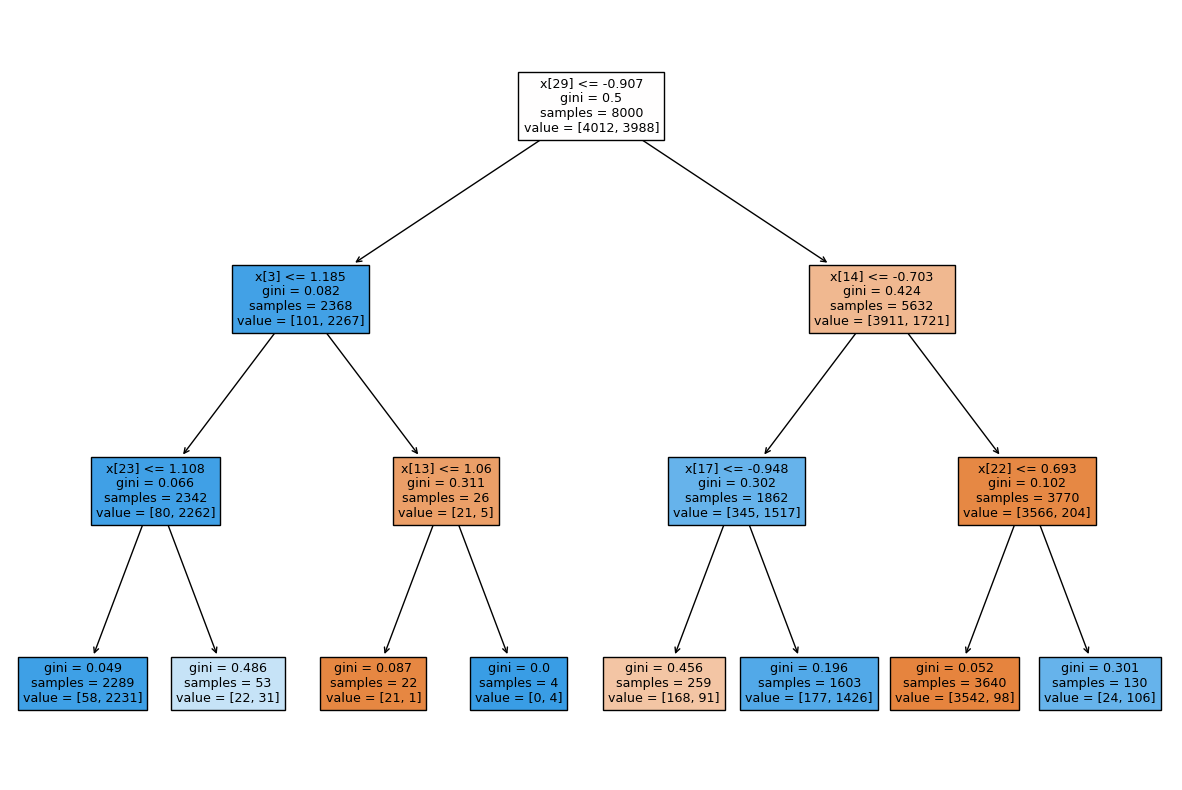

In [ ]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(treemodel, filled=True)

In [ ]:
y_pred = treemodel.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

Training time: 0.02 seconds
Accuracy: 94.65%
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       977
           1       0.95      0.94      0.95      1023

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



<Axes: >

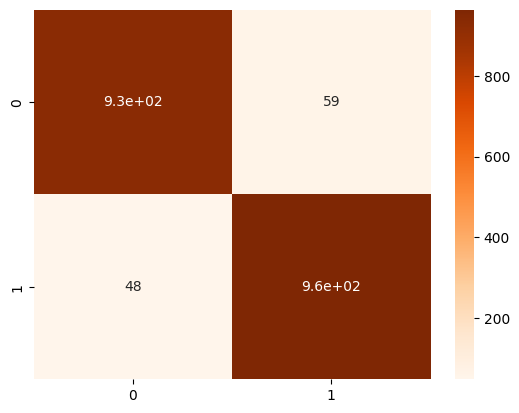

In [ ]:
score = accuracy_score(y_pred, y_test)
print("Training time: {:.2f} seconds".format(training_time))
print(f'Accuracy: {score * 100:.2f}%')
print(classification_report(y_pred, y_test))
conf_matrix = confusion_matrix(y_test, y_pred) #tính ma trận nhầm lẫn giữa dự đoán và nhãn thực tế (y_test)
sns.heatmap(conf_matrix, annot=True, cmap='Oranges') #vẽ heatmap của ma trận nhầm lẫn

Xgboots

In [ ]:
import xgboost as xgb
# Tạo một mô hình huấn luyện
xgb_model = xgb.XGBClassifier()
# Huấn luyện dữ liệu trên mô hình
start_time = time.time()
xgb_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
#Dự đoán và đánh giá mô hình
y_pred = xgb_model.predict(X_test)
accuracyxgb = accuracy_score(y_test, y_pred)
print("Training time: {:.2f} seconds".format(training_time))
print(f'Accuracy: {accuracyxgb * 100:.2f}%')
#Tạo báo cáo phân loại
report1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(report1)

Training time: 0.22 seconds
Accuracy: 98.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       988
           1       0.99      0.99      0.99      1012

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Confusion Matrix:
[[ 973   15]
 [   8 1004]]


<Axes: >

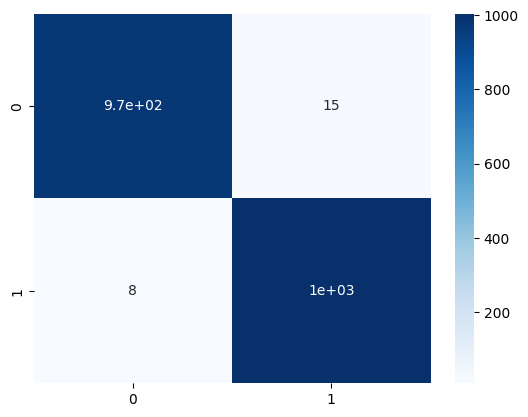

In [ ]:
# Tính toán ma trận nhầm lẫn
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')

In [ ]:
import os
dump(model, 'RF_model_2.joblib')
rf_model_size = os.path.getsize('RF_model_2.joblib') / 1024
print(f'RF_model_2.joblib Size: {rf_model_size:.2f} KB')
print(f'Accuracy: {accuracy * 100:.2f}%')

dump(treemodel, 'DT_model_2.joblib')
dt_model_size = os.path.getsize('DT_model_2.joblib') / 1024
print(f'DT_model_2.joblib Size: {dt_model_size:.2f} KB')
print(f'Accuracy: {score * 100:.2f}%')

dump(xgb_model, 'Xgb_model_2.joblib')
xgb_model_size = os.path.getsize('Xgb_model_2.joblib') / 1024
print(f'Xgb_model_2.joblib Size: {xgb_model_size:.2f} KB')
print(f'Accuracy: {accuracyxgb * 100:.2f}%')


RF_model_2.joblib Size: 5043.48 KB
Accuracy: 98.25%
DT_model_2.joblib Size: 2.27 KB
Accuracy: 94.65%
Xgb_model_2.joblib Size: 213.09 KB
Accuracy: 98.85%
